# **Cleaning the data**

Original Dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-13  329.970001  336.649994  328.890015  332.820007  332.820007   
1  2023-01-17  331.079987  332.500000  323.600006  326.220001  326.220001   
2  2023-01-18  326.750000  330.079987  321.250000  326.329987  326.329987   
3  2023-01-19  322.570007  324.890015  313.390015  315.779999  315.779999   
4  2023-01-20  336.790009  344.000000  332.630005  342.500000  342.500000   

     Volume  
0   8286800  
1   9247000  
2   7814100  
3  18008200  
4  28430300  

Mean value of 'Open': 395.7163342749004


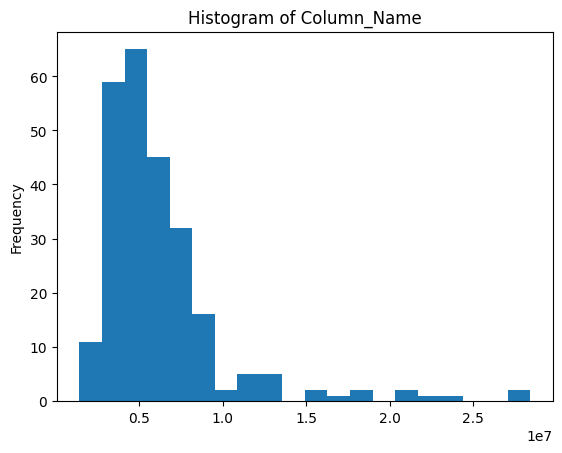

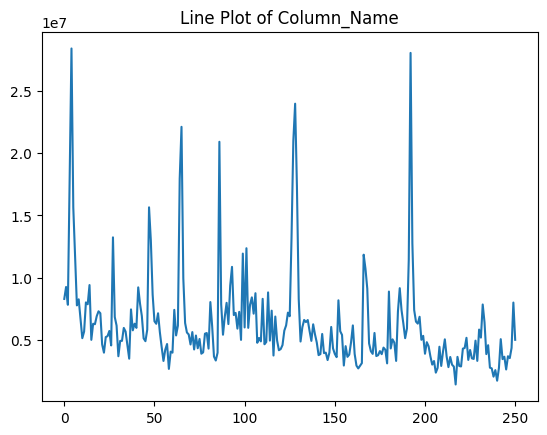


Cleaned Dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-13  329.970001  336.649994  328.890015  332.820007  332.820007   
1  2023-01-17  331.079987  332.500000  323.600006  326.220001  326.220001   
2  2023-01-18  326.750000  330.079987  321.250000  326.329987  326.329987   
3  2023-01-19  322.570007  324.890015  313.390015  315.779999  315.779999   
4  2023-01-20  336.790009  344.000000  332.630005  342.500000  342.500000   

     Volume  
0   8286800  
1   9247000  
2   7814100  
3  18008200  
4  28430300  

Cleaned dataset saved to cleaned_dataset.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
file_path = "NFLX.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Perform some operations (example: calculate mean of a column)
mean_value = df['Open'].mean()
print(f"\nMean value of 'Open': {mean_value}")

# Plot a graph (example: histogram)
df['Volume'].plot(kind='hist', bins=20, title='Histogram of Column_Name')
plt.show()

df['Volume'].plot(kind='line', title='Line Plot of Volume')
plt.show()

# Clean the data (example: drop missing values)
df_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_dataset.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


# **Applying a regression model on it**

Original Dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-13  329.970001  336.649994  328.890015  332.820007  332.820007   
1  2023-01-17  331.079987  332.500000  323.600006  326.220001  326.220001   
2  2023-01-18  326.750000  330.079987  321.250000  326.329987  326.329987   
3  2023-01-19  322.570007  324.890015  313.390015  315.779999  315.779999   
4  2023-01-20  336.790009  344.000000  332.630005  342.500000  342.500000   

     Volume  
0   8286800  
1   9247000  
2   7814100  
3  18008200  
4  28430300  

Mean Squared Error: 24.95999101972153


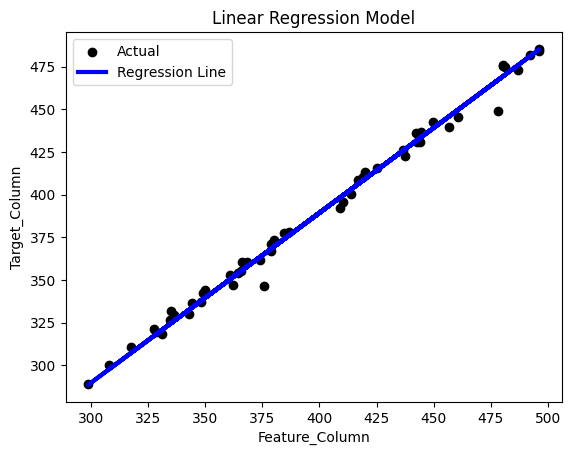

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
file_path = 'NFLX.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Assume 'feature_column' is the independent variable, and 'target_column' is the dependent variable
feature_column = 'High'
target_column = 'Low'

# Splitting a dataset into training and testing sets is 
# a common practice in machine learning to evaluate the performance 
# of a model on unseen data. The idea is to train the model on one subset of the data 
# (the training set) and then test its performance on another independent subset (the testing set). 
# This helps assess how well the model generalizes to new, unseen data.

# Split the dataset into training and testing sets
X = df[[feature_column]]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model')
plt.legend()
plt.show()
